# Нелинейное уравнение

Для x * 2^x - 1 (пункт л, №12.4): 

Один корень на [0.5, 1], ниже представлено объяснение

In [93]:
from re import S
import numpy as np
# import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from IPython.display import Image
import math

In [5]:
# F(x) = 0 - заданное уравнение
F = lambda x: x * math.pow(2, x) - 1

# f(x) = x - приведенное уравнение
f = lambda x: math.pow(2, -x)

# f'(x) - производная 
f_der = lambda x: (-np.log(2)) / math.pow(2, x)

<Figure size 640x480 with 0 Axes>

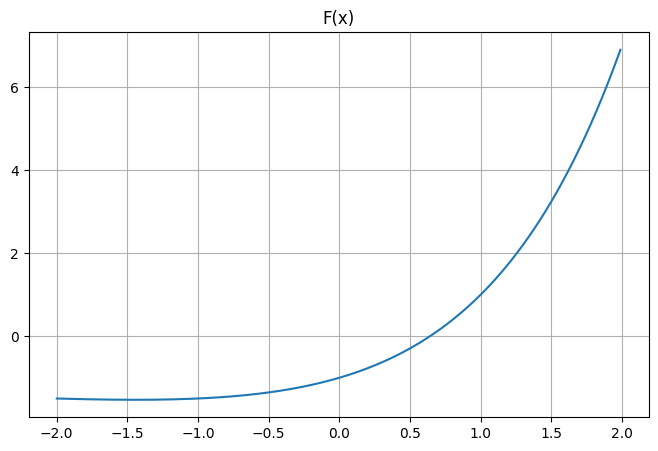

In [29]:
# График F(x)
plt.figure()
fig, ax1 = plt.subplots(figsize=(8, 5), dpi=100)
ax1.set_title("F(x)")

x = np.arange(-2, 2, 0.01)
y = np.arange(-2, 2, 0.01)
for i in range (400):
    y[i] = F(x[i])

plt.grid()
plt.plot(x, y)

<Figure size 640x480 with 0 Axes>

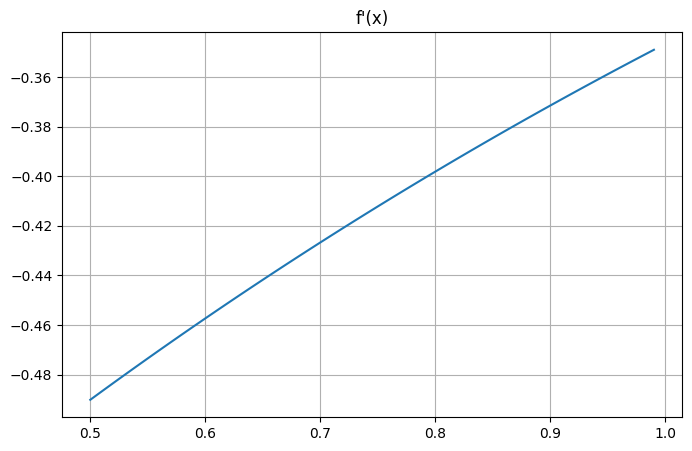

In [32]:
# График f'(x)

plt.figure()
fig, ax1 = plt.subplots(figsize=(8, 5), dpi=100)
ax1.set_title("f'(x)")

x = np.arange(0.5, 1, 0.01)
y = np.arange(0.5, 1, 0.01)
for i in range (50):
    y[i] = f_der(x[i])

plt.grid()
plt.plot(x, y)

Данный метод сходится на [0.5, 1], т.к. |f'(x)| < 1

Реализация МПИ с заданной точностью:


In [52]:
err = 1e-15            #точность
x_prev = 0             # x_n
x = 0.5                # x_(n+1)
while np.abs (x - x_prev) >= err:
    x_prev = x
    x = f(x_prev)

print ("Корень: ", x)
print ("Значение в точке:", F(x))

Корень:  0.6411857445049858
Значение в точке: -4.440892098500626e-16


# Система нелинейных уравнений

В качестве систем нелинейных уравнений возьмем №12.5(а) и №12.7(а)

$\begin{cases} sin (x + 1) - y = 1.2 \\ 2x + cos y = 2 \end{cases}$

Локализация корня: [0.4, 0.6] x [-0.3, -0.1]

$\begin{cases} 2 * x^2 - xy - 5x + 1 = 0 \\ x + 3lg(x) - y^2 = 0 \end{cases}$    

Локализация 1ого корня: [1.4, 1.5] x [-1.5, -1.3]

Локализация 2ого корня: [3.4, 3.5] x [2.2, 2.3]

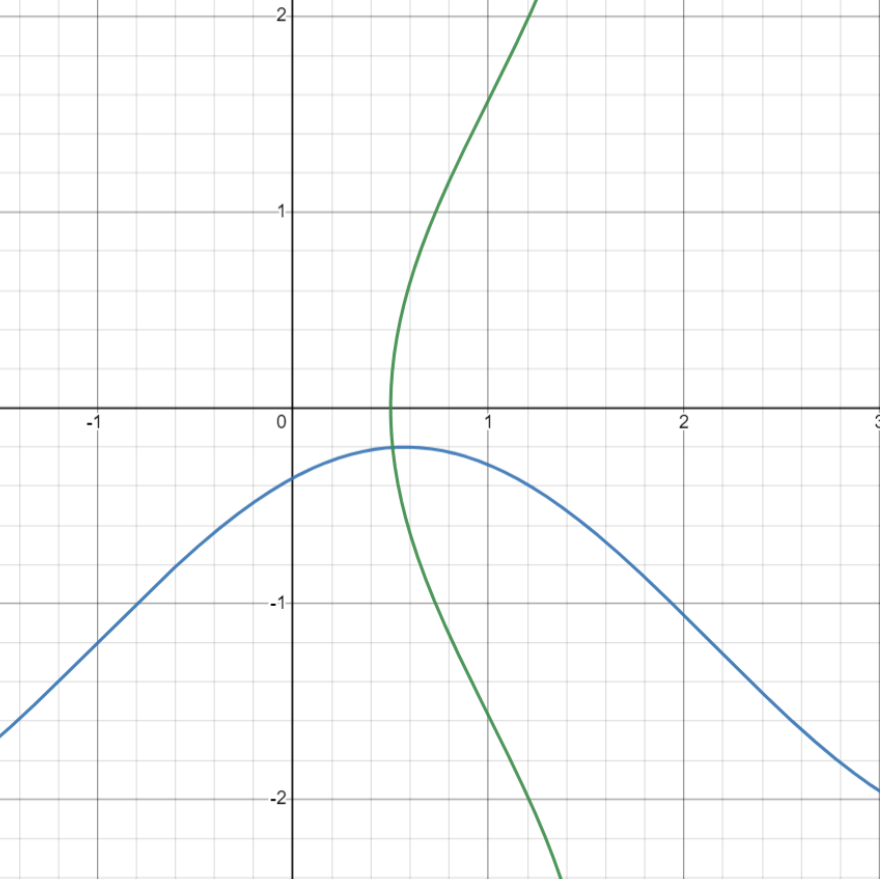

In [92]:
# Первая система уравнений, графики первого и второго уравнения
Image("./1_system.png")

In [101]:
# Первая система
def F1(x):
    return np.array ([np.sin (x[0] + 1) - x[1] - 1.2, 2 * x[0] + np.cos (x[1]) - 2])

# Якобиан первой системы
def J1(x):
    jac = np.zeros ((2, 2))

    jac[0, 0] = np.cos (x[0] + 1)
    jac[0, 1] = -1
    jac[1, 0] = 2
    jac[1, 1] = -np.sin (x[1])

    return jac

In [104]:
x_prev = np.array ([0, 0])        # x_n
x = np.array ([0.4, -0.3])        # x_(n+1)

while np.linalg.norm(x - x_prev) >= err:
    x_prev = x
    x = x_prev - np.matmul(np.linalg.inv(J1(x)), F1(x)) 

print ("Решение:", x)
print ("Значения F(x) в точке решения:", F1(x))

Решение: [ 0.51015016 -0.20183842]
Значения F(x) в точке решения: [0. 0.]


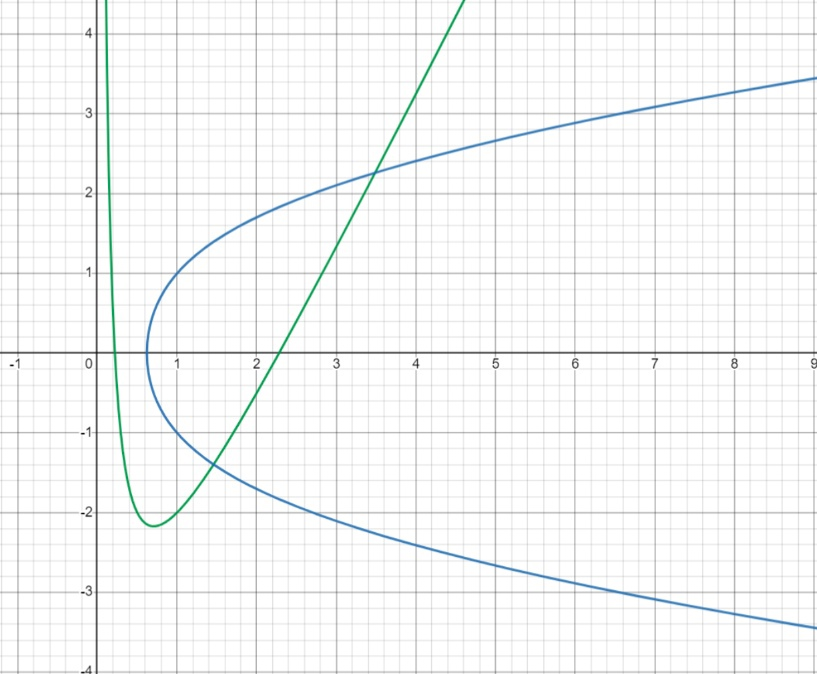

In [105]:
# Вторая система уравнений, графики первого и второго уравнения
Image("./2_system.png")

In [107]:
# Вторая система
def F2(x):
    return np.array ([2 * (x[0] ** 2) - x[0] * x[1] - 5 * x[0] + 1, x[0] + 3 * np.log10(x[0]) - (x[1] ** 2)])

# Якобиан второй системы
def J2(x):
    jac = np.zeros ((2, 2))

    jac[0, 0] = 4 * x[0] - x[1] - 5
    jac[0, 1] = -x[0]
    jac[1, 0] = 1 + 3 / (x[0] * np.log(10))
    jac[1, 1] = -2 * x[1]

    return jac

In [108]:
# Для первого корня
x_prev = np.array ([0, 0])        # x_n
x = np.array ([1.4, -1.5])        # x_(n+1)

while np.linalg.norm(x - x_prev) >= err:
    x_prev = x
    x = x_prev - np.matmul(np.linalg.inv(J2(x)), F2(x)) 

print ("Решение:", x)
print ("Значения F(x) в точке решения:", F2(x))

Решение: [ 1.45889023 -1.39676701]
Значения F(x) в точке решения: [0. 0.]


In [109]:
# Для второго корня
x_prev = np.array ([0, 0])        # x_n
x = np.array ([3.5, 2.3])        # x_(n+1)

while np.linalg.norm(x - x_prev) >= err:
    x_prev = x
    x = x_prev - np.matmul(np.linalg.inv(J2(x)), F2(x)) 

print ("Решение:", x)
print ("Значения F(x) в точке решения:", F2(x))

Решение: [3.48744279 2.26162863]
Значения F(x) в точке решения: [0.0000000e+00 8.8817842e-16]
